# Chapter 3: A Distribution Network


Looking at the chart from chapter 2 we miss the handling costs at the warehouse locations which we will add now.

For this purpose we assume warehouse costs of 2€/pallet at New Orlenas and 4€/pallet at New York warehouse. The only change to chapter 2 are in sections "Conversion","Compile and Graph the Net" and "Excecute the Net" below. All other parts are identical to chapter 2.

<div>
<img src="attachment:image.png" width="700" style="float:left">
</div>


<div>
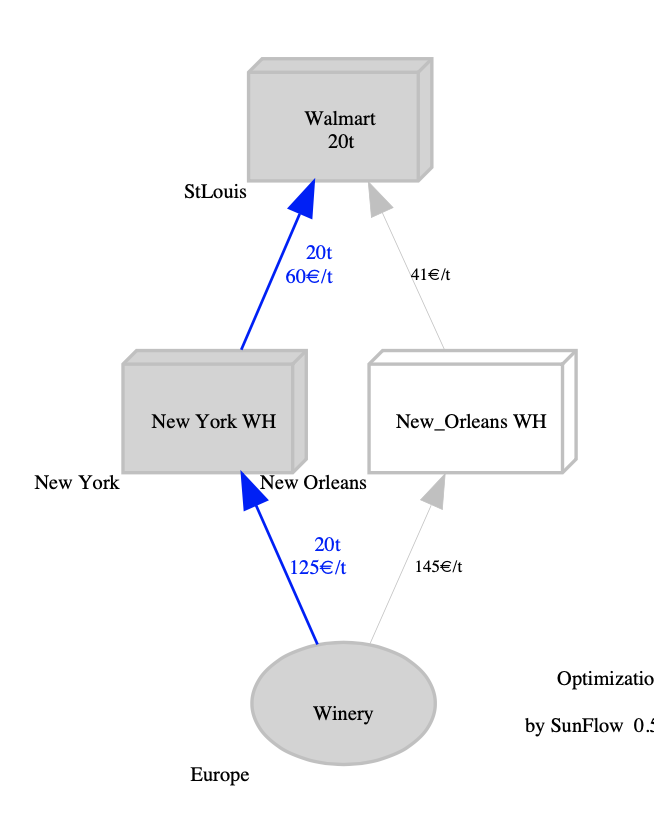
</div>

# Locations

The model contains a supplier, two warehouses and a customer. All of them are at physical locations whic we add now.

In [1]:
globals().clear(); import aitpath; from sunflow import SupplyNet,Logistics,Customer,Location,Freight,Producer

Europe      = Location('Europe')         # the Winery
New_York    = Location('New York')       # warehouse
New_Orleans = Location('New Orleans')    # warehouse
StLouis     = Location('StLouis')        # customer

# Freight Costs

With these locations we can now add transportation costs to relevant relations. A relation is given by a tuple (from, to, freight rate). Freight rates are the transportation costs per unit. For instance, the tranportation cost of one container with 20 pallets is 2500€; therefore the freight rate is 2500/20 = 125€/pallet.

In [2]:
Freight(Europe,       New_York,      2500/20 )
Freight(Europe,       New_Orleans,   2900/20 )
Freight(New_York,     StLouis,       1200/20 )
Freight(New_Orleans,  StLouis,        820/20 )
print()

# Producers, Customers, Logistics

Now we classify our actors into the groups Producers, Logistics and Customers and assign them a location enabling SunFlow to calculate the flow costs.

In [3]:
Winery          = Producer('Winery')          .at(Europe)
New_York_WH     = Logistics('New York WH')    .at(New_York)
New_Orleans_WH  = Logistics('New_Orleans WH') .at(New_Orleans)
Walmart         = Customer('Walmart')         .at(StLouis)

# Create a new Net¶

In [4]:
net = SupplyNet('Chapter 3 Distribution USA')

# Build the Net


As in chapter 1 we start with the first node - the supplier - which we name now as winery at location Winery. Normally there are 2 labels per node: the product name at this stage and the manufacturer, supplier, distribution hub or customer name. Since we dealing with the same product along the while change, we set the product name with .n(' ') to blank.

### NOTE / HINT

It is helpful if you follow some naming policy. Here the node names start are always with lower letter, whereas the locations, customers, producers,... start always with capital letters. This allows to use the same names, but still referencong different objects. 

In [5]:
winery = net.source().n(' ').by(Winery)  

# Conversion

Production, manufacturing or just handling products produce costs. These cost - as well costs per unit - are attached to those label with the varcosts() method as shown below.

In [6]:
new_york    = net.distribution(winery).n(' ')  .by(New_York_WH)     .varcost(4)
new_orleans = net.distribution(winery).n(' ')  .by(New_Orleans_WH)  .varcost(2)

And as well with the customer.

In [7]:
walmart = net.delivery(new_york, new_orleans).n(' ') .at(Walmart) .demand(20)

# Compile and Graph the Net

In [8]:
net.compile()
net.showGraph().view()

The net looks now much better. You see the labels and the freight rates attached to the relation arrows.


<div>
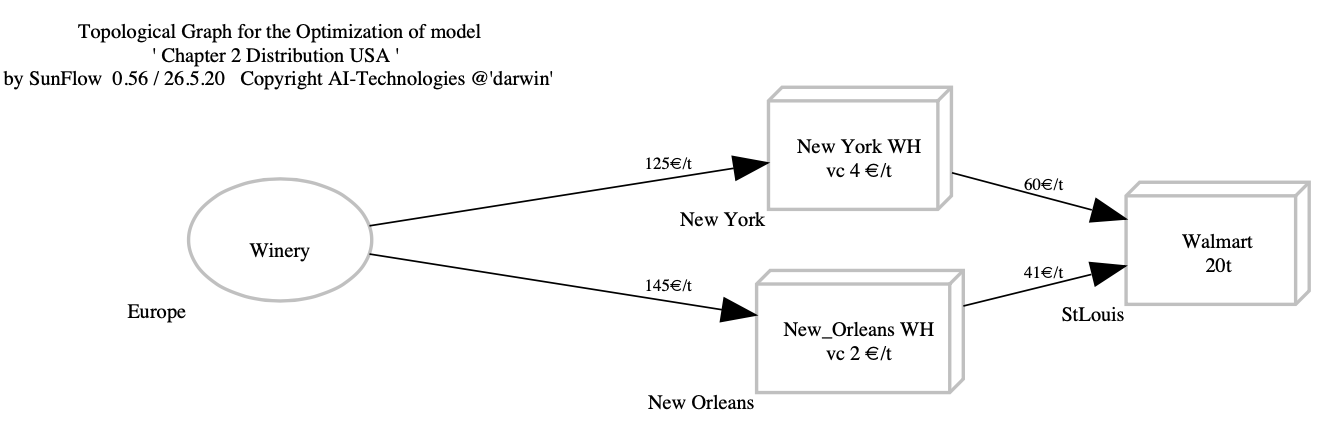
</div>

# Execute the Net

To identify the cheapest path you got to excecute the net's flow, i.e. its optimizer will be excecuted and the result displayed.

If you compare the chart below with the one from chapter 2, you see that it changed. Instead of going through New York not the cheapest route is by New Orleans: the cheaper handling costs at New Orleans brought the change!

In [9]:
net.execute().showGraph(orient='BT').view()


<div>
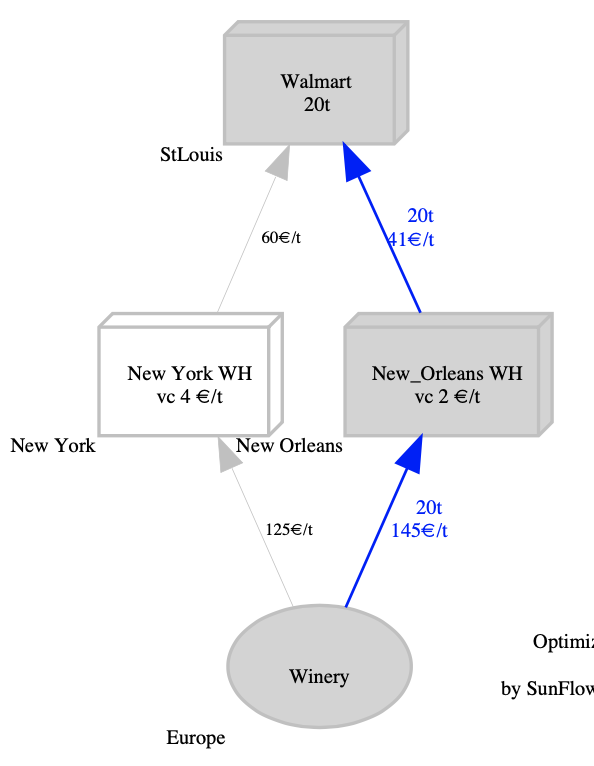
</div>

The blue lines indicate the cheapest path of the product flow and the quantities following the path ways.

# The Optimal Flow

Finally you may just want to see the optimized network excluding all options not used, i.e. just show nodes receiving or sending blue arrows. This is done by setting the parameter flowOnly to True (default=False).

In [10]:
net.execute().showGraph(flowOnly=True, orient='BT').view()


<div>
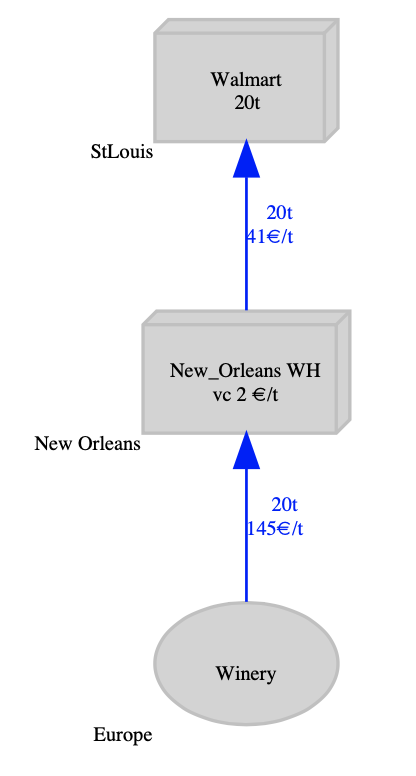
</div>